# Variance Swap for Heston Model

## 1. Model Setting

### 1.1 Heston model
$$
\left\{\begin{matrix}
 dS_t=\mu S_t dt+\sqrt{v_t}S_t dB_t^S\\
 dv_t=\kappa(\theta-v_t)dt+\sigma_V\sqrt{v_t}dB_t^V

\end{matrix}\right.
$$

$(dB_t^S,dB_t^V)=\rho dt$

Accordding to Heston (1993), these can be transfered to a risk-neutral probability measure:
$$
\left\{\begin{matrix}
 dS_t=\mu S_t dt+\sqrt{v_t}S_t d\tilde B_t^S\\
 dv_t=\kappa^*(\theta^*-v_t)dt+\sigma_V\sqrt{v_t}d\tilde B_t^V

\end{matrix}\right.
$$

$\kappa^*=\kappa+\lambda,\quad \theta^*=\frac{\kappa\theta}{\kappa+\lambda}$
where $\lambda$ is the premium of volatility risk


### 1.2 Variance Swap
the value of a variance swap at expiry:
$$
V_T=(\sigma_R^2-K_{VAR})\times L
$$

- $\sigma^2:$ annualized realized variance
- $K_{var}:$ annualized delivery price
- $L:$ notional amount of swap

in risk neutral world: $V_t=E_t^Q[e^{-r(T-t)}(\sigma_R^2-K_{var})L]$, therefore fair variance delivery price: $K_{var}=E_0^Q[\sigma_R^2]$

## 2. Method Existed in PyFENG
**Method existed in PyFeng using log-return to calculate realized variance**
$$
K_{var}:=\frac{1}{T}\sum_{i=1}^N E[(ln\frac{S_{t_{i+1}}}{S_{t_{t}}})^2]
$$
- `strike_var_swap_analytic()` function in heston.HestonABC()
    - refers: Analytic fair strike of variance swap. Eq (11) in Bernard & Cui (2014)
- `return_var_realized()` function in heston_mc.HestonMcABC()
    



## 3. Method Added 
Refer to [Bernard C, Cui Z (2014) Prices and Asymptotics for Discrete Variance Swaps. Applied Mathematical Finance 21:140–173. https://doi.org/10.1080/1350486X.2013.820524]() 
and 
[Song-Ping Zhu, Guang-Hua Lian (2011) A Closed-form Exact Solution for Pricing Variance Swaps with Stochastic Volatility]()

where the realized variance is caculated by:
$$
K_{var}:=\frac{1}{T}\sum_{i=1}^N E[(\frac{S_{t_{i+1}}}{S_{t_{t}}}-1)^2]
$$

We implemented 
- (eq 2.34) in Zhu & Lian (2011) 
- (Proposition3.2) in Bernard & Cui (2014)
- percentage change return from MC method

### 3.1 (eq 2.34) in Zhu & Lian (2011) 
The fair strike price for the variance swap is given as:
$$K_{var}=E_0^Q[\sigma_R^2]=\frac{e^{r\Delta t}}{T}[f(v_0)+\sum_{i=2}^Nf_i(v_0)]$$
where r is interest rate, $\Delta t$ is defined as $\frac{T}{N}$ and N is the number of obersavation days.

Function $f(v_0)$ and $f_i(v_0)$ are defined as:
$$f(v)=e^{\tilde C(\Delta t)+\tilde D(\Delta t)v}+e^{-r\Delta t}-2$$
$$\begin{aligned}f_{i}(v_{0})&=e^{\tilde{C}(\Delta t)+\frac{c_{i}e^{-\kappa^{*}t_{i-1}}}{c_{i}-\tilde{D}(\Delta t)}\tilde{D}(\Delta t)v_{0}}(\frac{c_{i}}{c_{i}-\tilde{D}(\Delta t)})^{\frac{2\kappa^{*}\theta^{*}}{\sigma_{V}^{2}}}+e^{-r\Delta t}-2\end{aligned}$$
where $t_i = i\Delta t$, and $\kappa^{*}, \theta^{*}, \sigma_{V}$ are the parameters of Heston model under risk-neutral probability measure.

Function $\tilde{C}(\Delta t)$ and $\tilde{D}(\Delta t)$ are derived from the generalized Fourier transform method which is used to solving the PDE of payoff.  $\tilde{C}(\Delta t)$ and $\tilde{D}(\Delta t)$  are defined as:
$$\left\{\begin{array}{ll}\widetilde C(\tau)=r\tau+\frac{\kappa^*\theta^*}{\sigma_V^2}[(\widetilde a+\widetilde b)\tau-2\ln(\frac{1-\widetilde ge^{\widetilde b\tau}}{1-\widetilde g})]\\\\\widetilde D(\tau)=\frac{\widetilde a+\widetilde b}{\sigma_V^2}(\frac{1-e^{\widetilde b\tau}}{1-\widetilde ge^{\widetilde b\tau}})\\\\\widetilde a=\kappa^*-2\rho\sigma_V,\quad\widetilde b=\sqrt{\widetilde a^2-2\sigma_V^2},\quad\widetilde g=(\frac{\widetilde a}{\sigma_V})^2-1+(\frac{\widetilde a}{\sigma_V})\sqrt{(\frac{\widetilde a}{\sigma_V})^2-2}\\\end{array}\right.$$

### 3.2 (Proposition3.2) in Bernard & Cui (2014)

$t_i=\frac{iT}{n},i=0,1,...,n$, $\Delta = T/n$, $\alpha=2\kappa\theta/\gamma^2-1\geq 0$,

Payoff $\frac{1}{T}\sum_{i=0}^{n-1}(\frac{S_{t_{i+1}-S_{t_i}}}{S_{t_i}})^2$ equals to
$$
K_{var}(n) = \frac{1}{T}(a_0+\sum_{i=1}^{n-1}a_i)+\frac{n-2ne^{r\Delta}}{T}
$$

$a_i=\frac{e^{2r\Delta}}{S_0^2}M(2,\Delta)e^{q(2)V_0(\frac{\eta(t_i)e^{-\kappa t_i}}{\eta(t_i)-q(2)}01)}(\frac{\eta(t_i)}{\eta(t_i)-q(2)})^{\alpha+1}$

where:

$M(u,t)=E[e^{uX_t}]=S_0^u e^{\frac{\kappa\theta}{\gamma^2}((\kappa-\gamma\rho u-d(u))t-2 ln(\frac{1-g(u)e^{-d(u)t}}{1-g(u)}))}e^{V_0\frac{\kappa-\gamma\rho u-d(u)t}{\gamma}\frac{1-e^{-d(u)t}}{1-g(u)e^{-d(u)t}}}$

$d(u)=\sqrt{(\kappa-\gamma\rho u)^2+\gamma^2(u-u^2)}$

$g(u)=\frac{\kappa-\gamma\rho u-d(u)}{\kappa-\gamma\rho u+d(u)}$

$q(u)=\frac{\kappa-\gamma\rho u -d(u)}{\gamma}\frac{1-e^{-d(u)\Delta}}{1-g(u)e^{-d(u)\Delta}}$

$\eta(u)=\frac{2\kappa}{\gamma^2}(1-e^{-\kappa u})^{-1}$

#### 3.3 MC
- added `return_pctvar_realized()` function in `heston_mc.py` to calcuate annualized variance
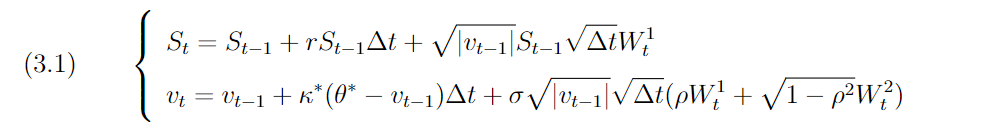
- take $v_t=max(0,v_t)$

## 4. Experiments

In [1]:
import sys
sys.path.insert(sys.path.index('')+1, r'C:\Users\LXY\Desktop\研究生课程\ASP\PyFENG')
import pyfeng as pf
import time
import numpy as np
import pandas as pd

In [2]:
# model parameters
kwargs = {'sigma': 0.04, 'vov': 0.618, 'rho': -0.64, 'mr': 11.35, 'theta': 0.022, 'intr': 0.1}

In [3]:
Model = pf.HestonMcGlassermanKim2011(**kwargs)
CMCModel = pf.HestonMcAndersen2008(**kwargs)
BasicModel = pf.heston_mc.HestonMC(**kwargs)

#### Result in Zhu & Lian

table for $\sigma_R^2=\frac{1}{T}\sum_{i=1}^N(\frac{S_{t_i}}{S_{t_{i-1}}}-1)^2*100^2$
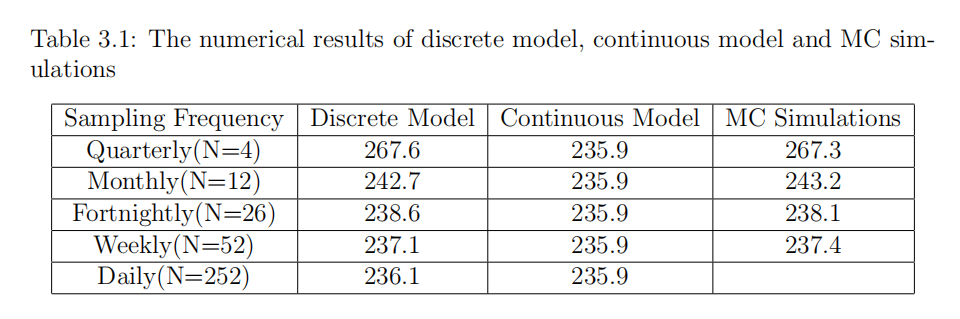
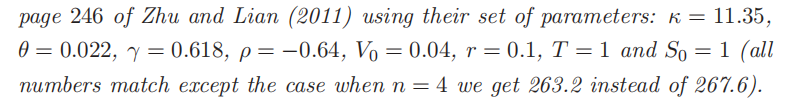

In [7]:
times_zhu = []
times_bern = []
times_exactmc = []
times_cmc = []
times_mc = []
analytic_zhu = []
analytic_bern = []
exactmc_mean = []
cmc_mean = []
mc_mean = []
exactmc_std = []
cmc_std = [] 
mc_std = []

for dt in [1/4, 1/12, 1/26, 1/52]:
    print('starting simulation for dt = ', dt)

    # analytic variance of Zhu's formula
    start_time = time.time()
    analytic_Zhu = Model.strike_var_swap_analytic_ZhuLian(texp=1, dt=dt)
    end_time = time.time()
    time_Zhu = end_time-start_time

    # analytic variance of Bernard Cui's formula
    start_time = time.time()
    analytic_Bern = Model.strike_var_swap_analytic_pctreturn(texp=1, dt=dt)
    end_time = time.time()
    time_Bern = end_time-start_time

    # get mc realized variance and time the simulation
    CMCModel.set_num_params(dt=dt,n_path=200000)
    start_time = time.time()
    vars = CMCModel.return_pctvar_realized(texp=1)
    mean_cmc = np.mean(vars)
    std_cmc = np.std(vars)
    end_time = time.time()
    time_cmc = end_time-start_time

    Model.set_num_params(dt=dt,n_path=200000)
    start_time = time.time()
    vars = Model.return_pctvar_realized(texp=1)
    mean_exactmc = np.mean(vars)
    std_exactmc = np.std(vars)
    end_time = time.time()
    time_exactmc = end_time-start_time

    BasicModel.set_num_params(dt=dt,n_path=200000)
    start_time = time.time()
    vars = BasicModel.return_pctvar_realized(texp=1)
    mean_mc = np.mean(vars)
    std_mc = np.std(vars)
    end_time = time.time()
    time_mc = end_time-start_time

    

    # print results
    print('Zhu Lian\'s formula: ', analytic_Zhu)
    print('Bernard Cui\'s formula: ', analytic_Bern)
    print('MC realized variance: ', mean_mc)
    print('CMC realized variance: ', mean_cmc)
    print('ExactMC realized variance: ', mean_exactmc)
    print('MC realized variance std: ', std_mc)
    print('CMC realized variance std: ', std_cmc)
    print('ExactMC realized variance std: ', std_exactmc)
    print('time for Zhu Lian\'s formula: ', time_Zhu)
    print('time for Bernard Cui\'s formula: ', time_Bern)
    print('time for MC simulation: ', time_mc)
    print('time for CMC simulation: ', time_cmc)
    print('time for ExactMC simulation: ', time_exactmc)
    print('----------------------------------')
    
    analytic_zhu.append(analytic_Zhu)
    analytic_bern.append(analytic_Bern)
    exactmc_mean.append(mean_exactmc)
    exactmc_std.append(std_exactmc)
    mc_mean.append(mean_mc)
    mc_std.append(std_mc)
    cmc_mean.append(mean_cmc)
    cmc_std.append(std_cmc)
    times_zhu.append(time_Zhu)
    times_bern.append(time_Bern)
    times_cmc.append(time_cmc)
    times_exactmc.append(time_exactmc)
    times_mc.append(time_mc)

    time.sleep(1)
    
res = pd.DataFrame({'dt': [1/4, 1/12, 1/26, 1/52], 'analytic_zhulian': analytic_zhu, 'analytic_bern': analytic_bern,\
                     'mc_mean': mc_mean, 'cmc_mean': cmc_mean,'exactmc_mean': exactmc_mean, 'mc_std': mc_std, 'cmc_std': cmc_std,  'exactmc_std': exactmc_std, \
                    'time_ZhuLian': times_zhu, 'time_Bern': times_bern,'time_mc': times_mc, 'time_cmc': times_cmc, 'time_exactmc': times_exactmc})


starting simulation for dt =  0.25
Zhu Lian's formula:  0.02632143084055675
Bernard Cui's formula:  0.02632143084055727
MC realized variance:  0.03487467662551381
CMC realized variance:  0.026499679482084662
ExactMC realized variance:  0.026408175790440937
MC realized variance std:  0.0340573875616237
CMC realized variance std:  0.019607639030466525
ExactMC realized variance std:  0.019721473127171013
time for Zhu Lian's formula:  0.0
time for Bernard Cui's formula:  0.0
time for MC simulation:  0.04999995231628418
time for CMC simulation:  0.10651612281799316
time for ExactMC simulation:  0.5356192588806152
----------------------------------
starting simulation for dt =  0.08333333333333333
Zhu Lian's formula:  0.024272086521686692
Bernard Cui's formula:  0.024272086521682112
MC realized variance:  0.027859771492387844
CMC realized variance:  0.024006852994623754
ExactMC realized variance:  0.024261866608035636
MC realized variance std:  0.016591855073948374
CMC realized variance std:

In [8]:
# good format for printing dataframe res
pd.options.display.float_format = '{:.6f}'.format
print(res)

        dt  analytic_zhulian  analytic_bern  mc_mean  cmc_mean  exactmc_mean  \
0 0.250000          0.026321       0.026321 0.034875  0.026500      0.026408   
1 0.083333          0.024272       0.024272 0.027860  0.024007      0.024262   
2 0.038462          0.023858       0.023858 0.025532  0.023768      0.023830   
3 0.019231          0.023711       0.023711 0.024499  0.023652      0.023471   

    mc_std  cmc_std  exactmc_std  time_ZhuLian  time_Bern  time_mc  time_cmc  \
0 0.034057 0.019608     0.019721      0.000000   0.000000 0.050000  0.106516   
1 0.016592 0.013545     0.013923      0.000000   0.000000 0.161142  0.302651   
2 0.011737 0.011328     0.011355      0.000000   0.002004 0.320607  0.633770   
3 0.009744 0.009863     0.009495      0.000507   0.002004 0.721652  1.268726   

   time_exactmc  
0      0.535619  
1      2.113617  
2      5.688960  
3     13.508999  
